In [2]:
from align_reader import *
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
user_path = '/mounts/work/weissweiler/deepcase/final_data/spacy_3.2_trf/'
(matrix_tsne, verse_dict, langword_to_id) = pickle.load(open(user_path + "matrix_tsne.p", "rb"))

In [4]:
def get_ngrams(word):
    ngrams = set()
    word = '$' + word.lower() + '$'
    word_length = len(word)
    for first_i in range(word_length):
            if first_i == 1:
                continue

            ngram = word[first_i:]
            if ngram != "$":
                ngrams.add(ngram)

    return ngrams

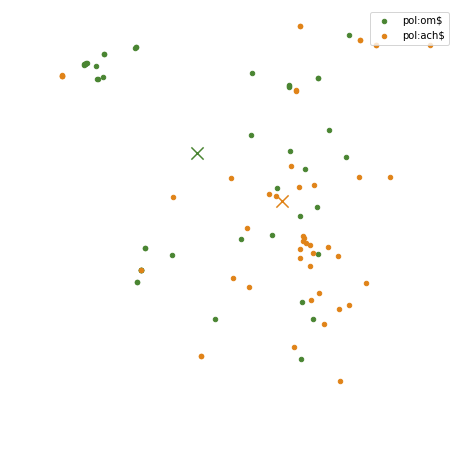

In [20]:


plt.rcParams['figure.figsize'] = [8, 8]

base_ngram = "lat:ibus$"
search_ngrams = {"pol:ach$":"orange", "pol:om$":"green"}
colour_to_ngram = {colour:ngram for ngram, colour in search_ngrams.items()}
all_colours = sorted(search_ngrams.values())
search_languages = {ngram[:3] for ngram in search_ngrams}


colour_points_dict = {colour:([], []) for colour in all_colours}
rgb = {"orange":[224 / 255, 131 / 255, 24 / 255], "green":[74 / 255, 133 / 255, 50 / 255]}
orange = [224 / 255, 131 / 255, 24 / 255]
green = [74 / 255, 133 / 255, 50 / 255]
xlim = (-40,20)
ylim = (-15, 20)
fig, ax = plt.subplots()
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])

colour_sums = {colour:([0,0]) for colour in all_colours}
colour_count = {colour:0 for colour in all_colours}

for (nounp_id, nounp), (x, y) in zip(sorted(verse_dict.items()), matrix_tsne):
    if xlim[0] < x < xlim[1] and ylim[0] < y < ylim[1]:
        search_ngrams_present = set()
        base_ngram_present = False
        for prf, words in nounp.items():
            if prf == base_ngram[:3]:
                for word in words:
                    ngrams = get_ngrams(word)
                    for ngram in ngrams:
                        longer_ngram = prf + ":" + ngram
                        if longer_ngram == base_ngram:
                            base_ngram_present = True
            elif prf in search_languages:
                for word in words:
                    ngrams = get_ngrams(word)
                    for ngram in ngrams:
                        longer_ngram = prf + ":" + ngram
                        if longer_ngram in search_ngrams:
                            search_ngrams_present.add(longer_ngram)
        
        if not (base_ngram_present and len(search_ngrams_present) > 0):
            continue
        if len(search_ngrams_present) == 1:
            colour = search_ngrams[list(search_ngrams_present)[0]]
            colour_points_dict[colour][0].append(x)
            colour_points_dict[colour][1].append(y)
            colour_sums[colour][0] += x
            colour_sums[colour][1] += y
            colour_count[colour] += 1

        elif len(search_ngrams_present) > 1:
            raise NotImplementedError("This could work with multiple languages but isn't fully implemented")

for colour, sum_lists in colour_sums.items():
    x = sum_lists[0] / colour_count[colour]
    y = sum_lists[1] / colour_count[colour]
    ax.scatter(x,y, color=rgb[colour], s=150, marker="x")

scattered_list = []
for colour, (x,y) in colour_points_dict.items():
    ax.scatter(x,y, color=rgb[colour], s=20, label=colour_to_ngram[colour])

ax.axis('off')

ax.legend()
fig.savefig("case_marker_map_pol_ach_om.pdf", bbox_inches='tight',pad_inches = 0)
fig.show()